# Compare gridded cloud data to surface-observed clouds at a site

### Jump to [plots](#plots)
### Jump to [ISCCP comparison monthly series](#ISCCP)
### Jump to [trends at all sites?](#trends)

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
# Open surface fileL Bahamas goes to 2020 (actually into 2021)
filename = '/Users/bem/Box/combined_netcdf/Bahamas_surfaceobs_1971-2020.nc'
sc = xr.open_dataset(filename).to_pandas(); 

# append a column with datetime and make it the Index
sc['Datetime'] = pd.to_datetime(sc[['year', 'month', 'day', 'hour']])
sc = sc.set_index('Datetime')

# drop some redundant columns
sc.drop(['station','name','year','month','hour','day','elevation'], axis=1, inplace=True)

sc.describe()

,Unnamed: 0,lat,lon,ws,wd,n,slp,at,h,nh,cl,cm,ch,visibility,wind_speed,temp,dwpt,mslp,rain
count,99139.000000,99139.000000,99139.000000,97874.000000,97874.000000,97874.000000,98743.000000,99053.000000,78878.000000,98489.000000,98487.000000,98132.000000,96768.000000,8796.000000,27792.000000,28971.000000,28860.000000,28661.000000,14300.000000
mean,29028.418856,25.044096,-32.060575,36.848070,115.593753,4.011035,10073.717357,253.232431,4.168513,2.753455,4.386447,1.221426,0.976449,64.071510,6.631585,261.570502,216.164865,1017.429280,1.086620
std,19928.212216,0.019555,70.525272,26.087247,109.344543,2.315275,1953.990228,48.633511,1.774772,1.819157,3.360653,2.467726,1.634530,4.659894,5.505816,36.427213,39.507067,9.002105,9.618231
min,0.000000,25.000000,-77.500000,-1.000000,-1.000000,0.000000,-1.000000,-420.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,95.000000,0.000000,915.700000,0.000000
25%,12392.000000,25.038958,-77.470000,21.000000,50.000000,2.000000,10151.000000,230.000000,4.000000,1.000000,2.000000,0.000000,0.000000,63.000000,3.000000,239.000000,196.000000,1015.300000,0.000000
50%,24784.000000,25.050000,-77.470000,36.000000,100.000000,4.000000,10172.000000,254.000000,4.000000,2.000000,2.000000,0.000000,0.000000,65.000000,6.000000,264.000000,226.000000,1017.400000,0.000000
75%,45296.500000,25.050000,77.466231,51.000000,150.000000,6.000000,10193.000000,279.000000,5.000000,4.000000,8.000000,2.000000,2.000000,65.000000,9.000000,288.000000,245.000000,1019.400000,0.000000
max,70081.000000,25.500000,77.466231,509.000000,990.000000,9.000000,99999.000000,921.000000,9.000000,9.000000,11.000000,12.000000,9.000000,69.000000,99.000000,921.000000,997.000000,1818.000000,900.000000


<AxesSubplot:ylabel='Frequency'>

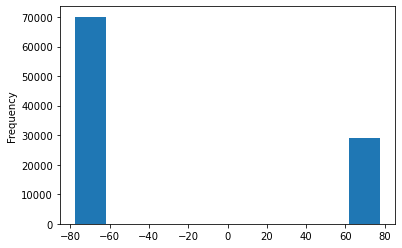

In [3]:
sc.lon.plot.hist() # sigh, reporting errors pos/neg

In [4]:
sc.lon = sc.lon.min() # fix longitude

<AxesSubplot:ylabel='Frequency'>

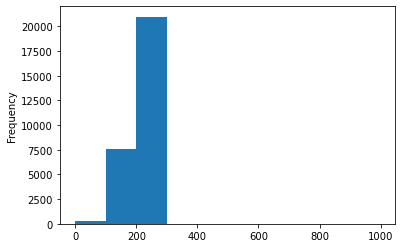

In [5]:
sc.dwpt.plot.hist() #max dewpoint is 997, mask out that whole obs

<AxesSubplot:ylabel='Frequency'>

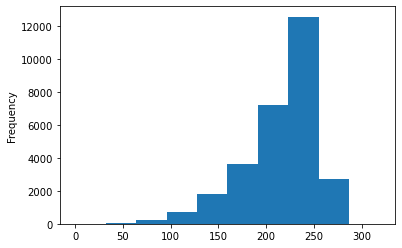

In [6]:
sc.mask(sc.dwpt > 320)['dwpt'].plot.hist() # that looks better, let's do it 

In [7]:
sc.mask(sc.dwpt > 320, inplace=True) # Throw out whole record when dwpt is absurd
sc.describe() # still a few QC issues in there, max values for instance

,Unnamed: 0,lat,lon,ws,wd,n,slp,at,h,nh,cl,cm,ch,visibility,wind_speed,temp,dwpt,mslp,rain
count,99132.000000,99132.000000,99132.0,97867.000000,97867.000000,97867.000000,98737.000000,99046.000000,78875.000000,98483.000000,98481.00000,98126.000000,96762.000000,8793.000000,27785.000000,28964.000000,28853.000000,28655.000000,14298.000000
mean,29029.583041,25.044096,-77.5,36.848243,115.588942,4.011005,10073.711375,253.234588,4.168456,2.753440,4.38643,1.221430,0.976499,64.071193,6.631564,261.579892,216.036877,1017.429325,1.086772
std,19928.309207,0.019555,0.0,26.087552,109.341210,2.315316,1954.049438,48.633369,1.774723,1.819166,3.36065,2.467717,1.634566,4.660657,5.506120,36.421203,38.465188,9.002986,9.618895
min,0.000000,25.000000,-77.5,-1.000000,-1.000000,0.000000,-1.000000,-420.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,0.000000,0.000000,95.000000,0.000000,915.700000,0.000000
25%,12392.750000,25.038958,-77.5,21.000000,50.000000,2.000000,10151.000000,230.000000,4.000000,1.000000,2.00000,0.000000,0.000000,63.000000,3.000000,239.000000,196.000000,1015.300000,0.000000
50%,24786.000000,25.050000,-77.5,36.000000,100.000000,4.000000,10172.000000,254.000000,4.000000,2.000000,2.00000,0.000000,0.000000,65.000000,6.000000,264.000000,226.000000,1017.400000,0.000000
75%,45298.250000,25.050000,-77.5,51.000000,150.000000,6.000000,10193.000000,279.000000,5.000000,4.000000,8.00000,2.000000,2.000000,65.000000,9.000000,288.000000,245.000000,1019.400000,0.000000
max,70081.000000,25.500000,-77.5,509.000000,990.000000,9.000000,99999.000000,921.000000,9.000000,9.000000,11.00000,12.000000,9.000000,69.000000,99.000000,921.000000,319.000000,1818.000000,900.000000


<a id='plots' ></a>
# Anyhoo, let's make some plots 

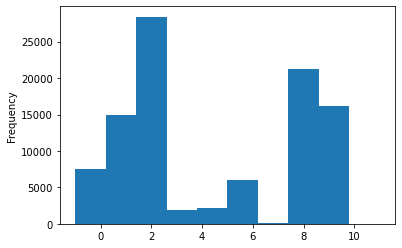

In [8]:
# Low cloud histogram: mean and std given above but it's bimodal 
sc.cl.plot.hist();

<AxesSubplot:xlabel='Datetime,Datetime'>

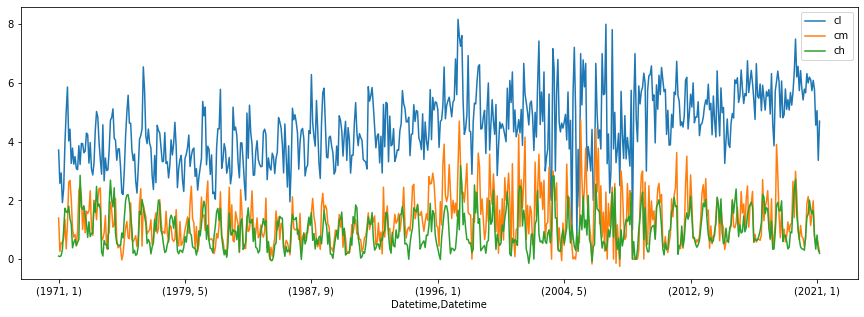

In [9]:
# Monthly mean time series

momeans=sc.groupby([(sc.index.year),(sc.index.month)]).mean()
momeancloud = momeans[['cl','cm','ch']]
momeancloud.plot(figsize=[15,5])

<AxesSubplot:xlabel='Datetime'>

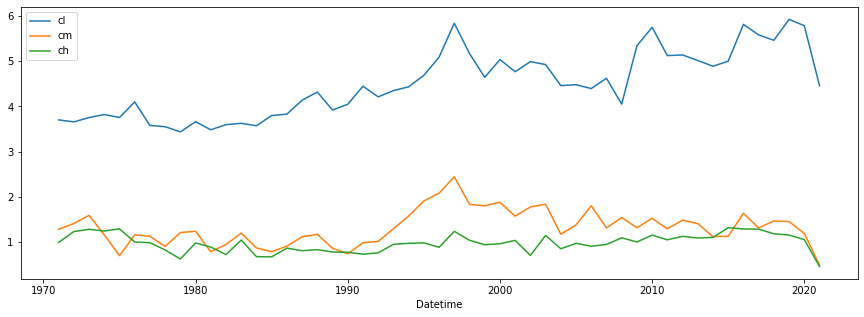

In [10]:
# Annual means

annmeans=sc.groupby([(sc.index.year)]).mean()
annmeans[['cl','cm','ch']].plot(figsize=[15,5])

<a id='ISCCP'></a>

## Compare monthly ISCCP cloud grid cell at this location

In [11]:
# URL = 'https://goldsmr4.gesdisc.eosdis.nasa.gov/dods/M2TMNXRAD' # MERRA2 clouds, requires some authentication

In [23]:
# ISCCP grids in OpenDap server at Hawaii: 

URL = 'http://apdrc.soest.hawaii.edu:80/dods/public_data/satellite_product/isccp/isccp_mon'
IS = xr.open_dataset(URL)


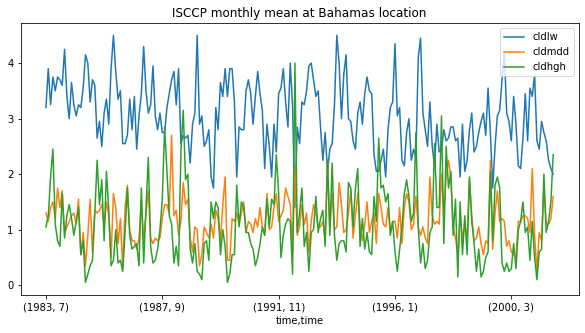

In [13]:
# Select Bahamas point, call it xBAH for xarray, BAH for pandas frame
# CAREFUL with LON!! -- but in this case both datasets use negative for lonW. 

xBAH = IS.sel(lat=sc.lat.mean(), lon=sc.lon.mean(), method='nearest'); xBAH;

# convert to Pandas for a multi-line plot, and change units to tenths (seems to be the surface unit although it goes to 11

BAH = xBAH[['cldlw','cldmdd','cldhgh']].squeeze().drop_vars(['lat','lon','lev']).to_pandas()
# Make monthly means, not artificially on 15th of the month
BAH = BAH.groupby([BAH.index.year, BAH.index.month]).mean()/10

BAH.plot(figsize=[10,5]); plt.title('ISCCP monthly mean at Bahamas location');

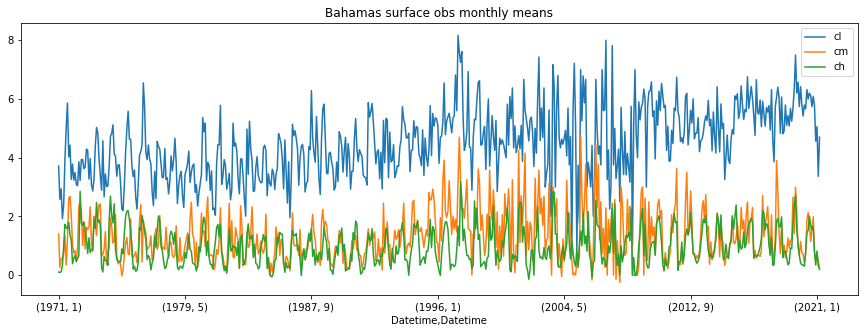

In [14]:
momeancloud.plot(figsize=[15,5]); plt.title('Bahamas surface obs monthly means');

Text(0.5, 1.0, 'Bahamas monthly clouds: ISCCP/10 and surface obs')

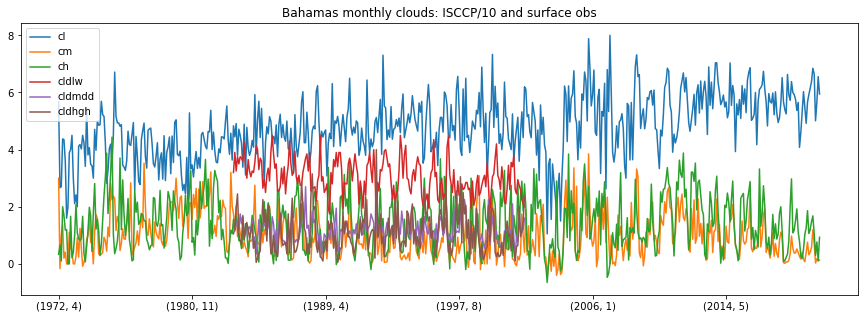

In [17]:
# Concatenate them and plot together 
pd.concat([momeancloud,BAH], axis=1).plot(figsize=[15,5]); plt.title('Bahamas monthly clouds: ISCCP/10 and surface obs')

<a id='trends'></a>

## Trends at all sites?

/Users/bem/Box/combined_netcdf/Bahamas_surfaceobs_1971-2020.nc
/Users/bem/Box/combined_netcdf/Barbados_surfaceobs_1971-2015.nc
/Users/bem/Box/combined_netcdf/Bermuda_surfaceobs_1971-2020.nc
/Users/bem/Box/combined_netcdf/Cuba_surfaceobs_1971-2020.nc
/Users/bem/Box/combined_netcdf/DominicanRepublic_surfaceobs_1971-2020.nc
/Users/bem/Box/combined_netcdf/KingstonJamaica_surfaceobs_1971-2020.nc
/Users/bem/Box/combined_netcdf/PuertoRico_surfaceobs_1971-2020.nc
/Users/bem/Box/combined_netcdf/PuertoVallartaMexico_surfaceobs_1971-2020.nc
/Users/bem/Box/combined_netcdf/StLucia_surfaceobs_1971-2020.nc


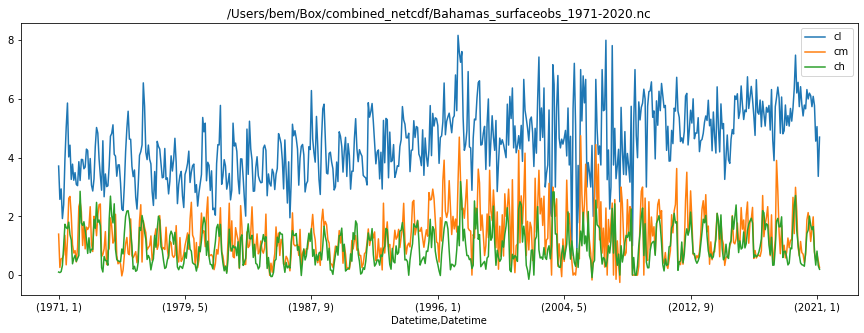

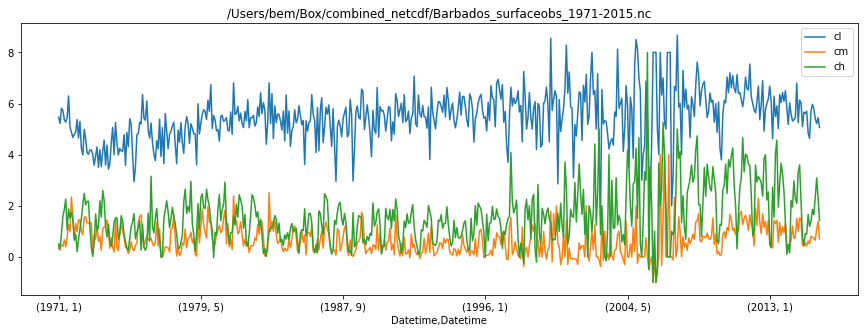

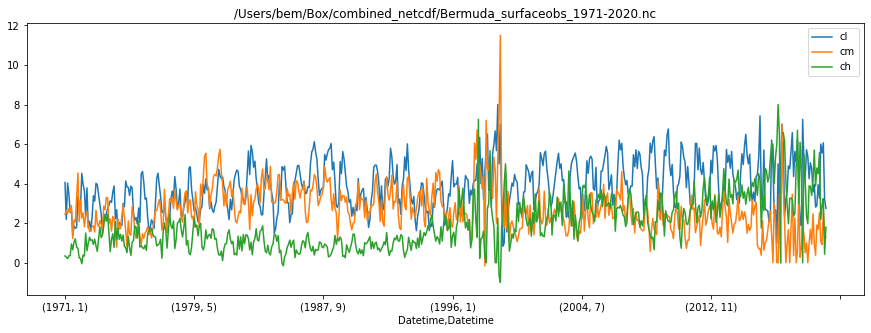

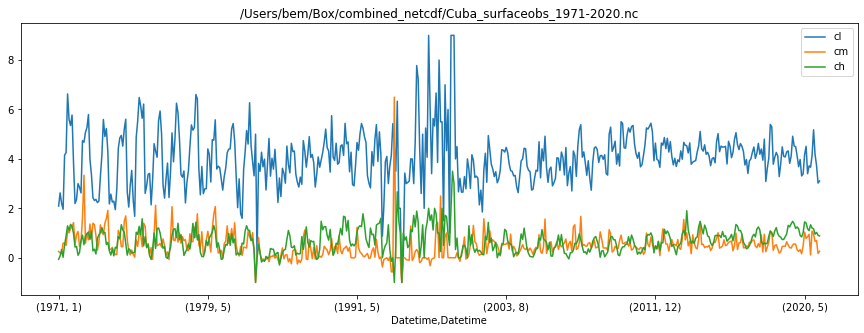

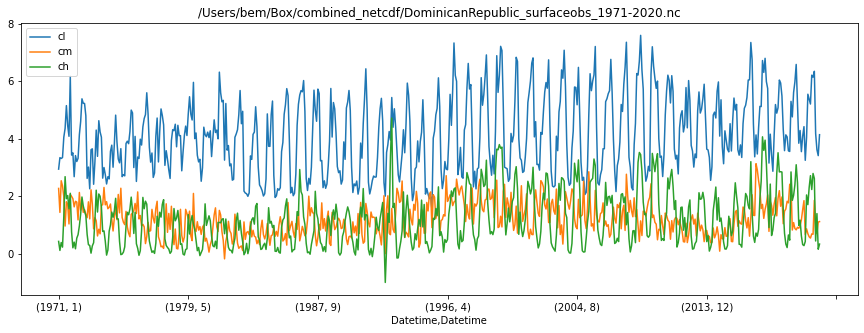

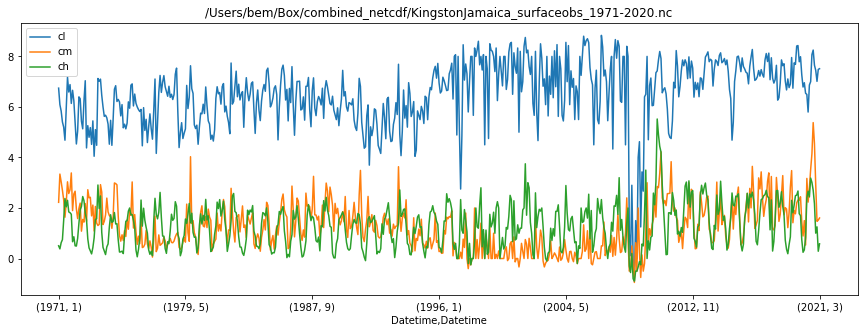

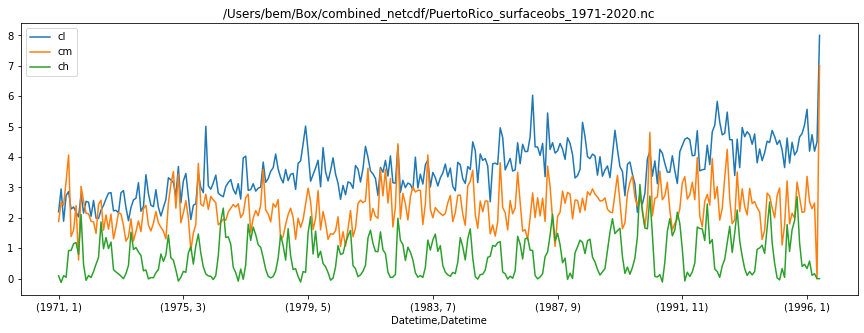

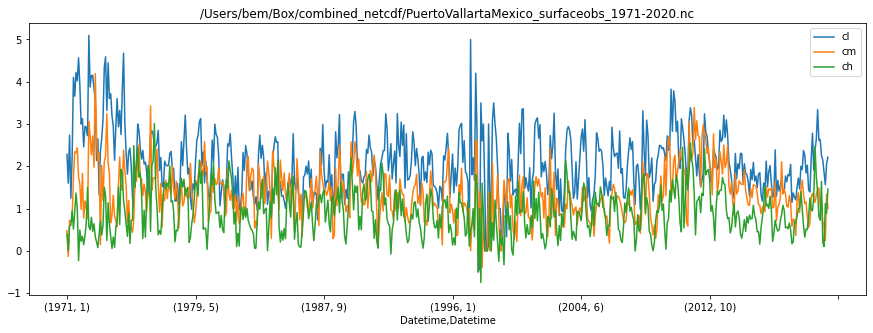

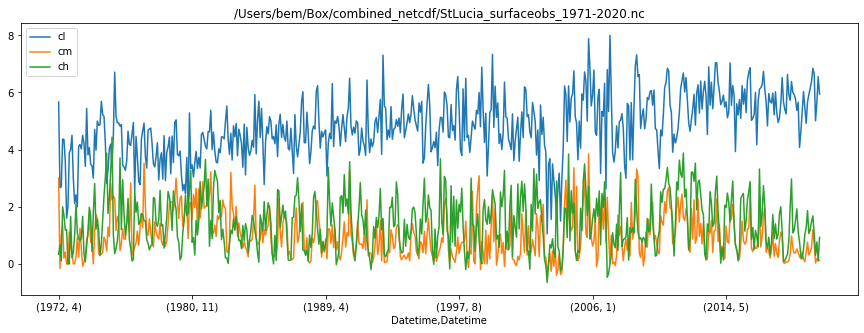

In [20]:
FOLDERNAME = '/Users/bem/Box/combined_netcdf//*.nc'
import glob

# Loop over all files making the plots above 
for file_name in glob.glob(FOLDERNAME):
    print(file_name)
    sc = xr.open_dataset(file_name).to_pandas()
    # append a column with datetime and make it the Index
    sc['Datetime'] = pd.to_datetime(sc[['year', 'month', 'day', 'hour']])
    sc = sc.set_index('Datetime')
    
    sc = sc.mask(sc.ch > 100) # special for St. Lucia which has an outlier in hc
    
    # Make the monthly means 
    momeans=sc.groupby([(sc.index.year),(sc.index.month)]).mean()
    momeancloud = momeans[['cl','cm','ch']]

    momeancloud.plot(figsize=[15,5],title=file_name)

/Users/bem/Box/combined_netcdf/Bahamas_surfaceobs_1971-2020.nc
/Users/bem/Box/combined_netcdf/Barbados_surfaceobs_1971-2015.nc
/Users/bem/Box/combined_netcdf/Bermuda_surfaceobs_1971-2020.nc
/Users/bem/Box/combined_netcdf/Cuba_surfaceobs_1971-2020.nc
/Users/bem/Box/combined_netcdf/DominicanRepublic_surfaceobs_1971-2020.nc
/Users/bem/Box/combined_netcdf/KingstonJamaica_surfaceobs_1971-2020.nc
/Users/bem/Box/combined_netcdf/PuertoRico_surfaceobs_1971-2020.nc
/Users/bem/Box/combined_netcdf/PuertoVallartaMexico_surfaceobs_1971-2020.nc
/Users/bem/Box/combined_netcdf/StLucia_surfaceobs_1971-2020.nc


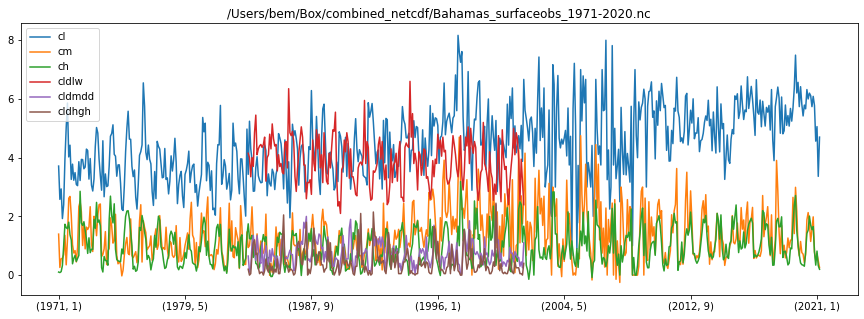

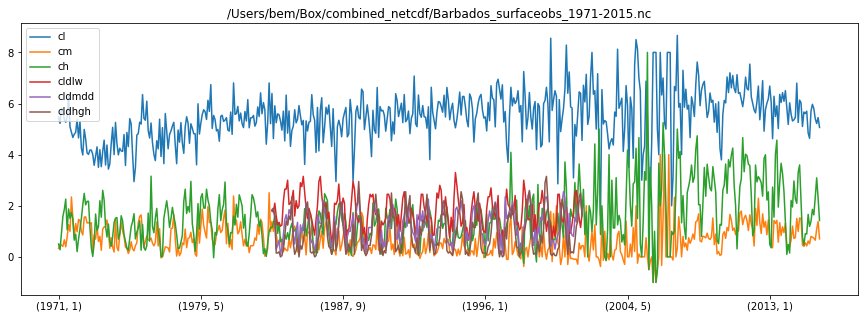

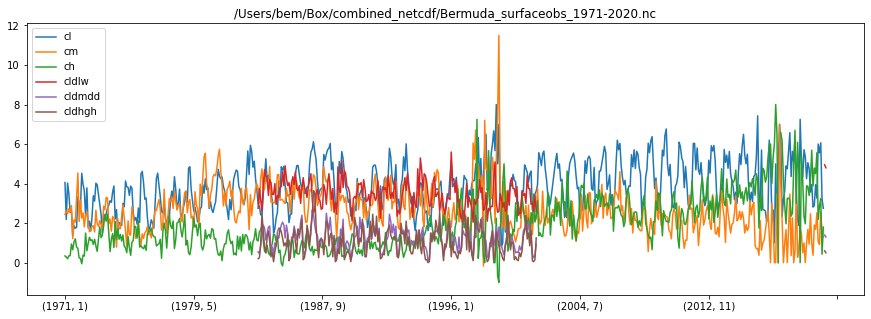

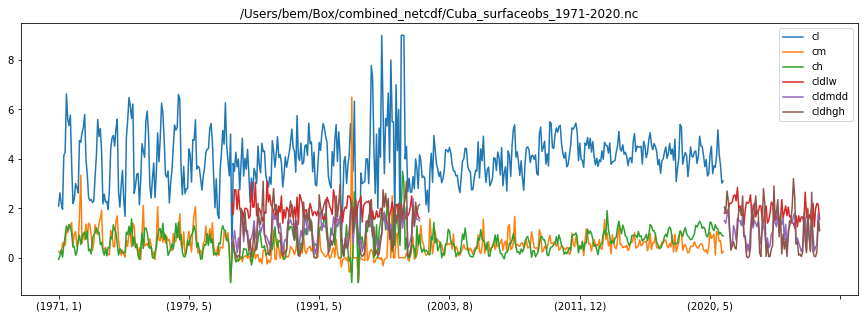

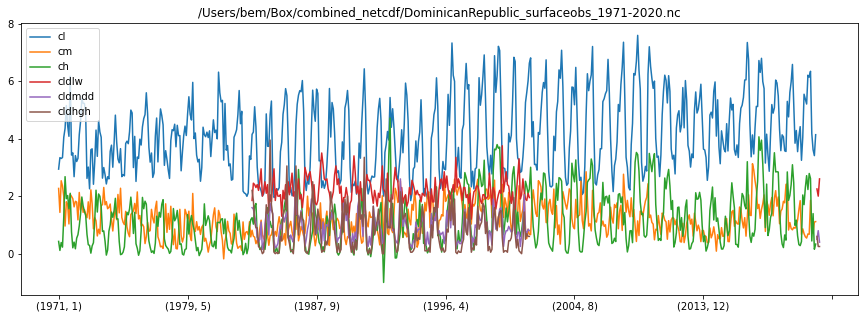

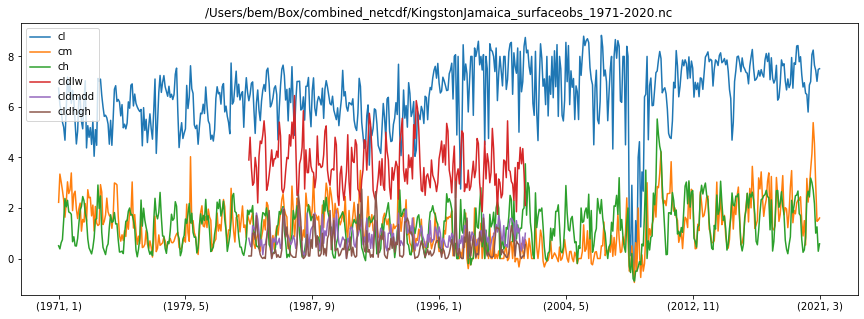

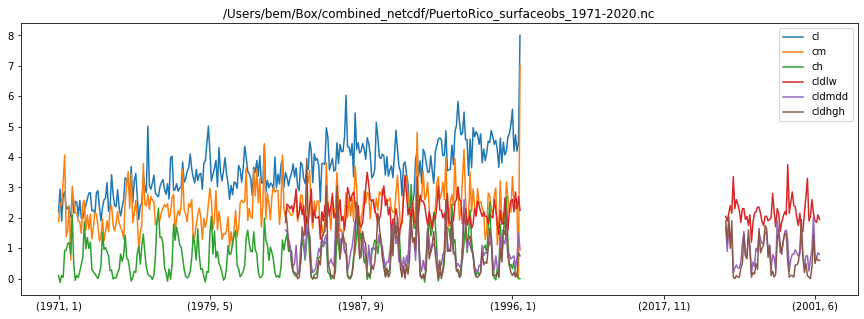

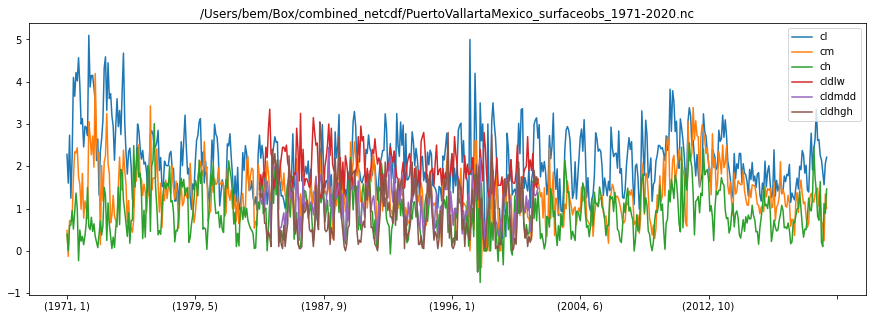

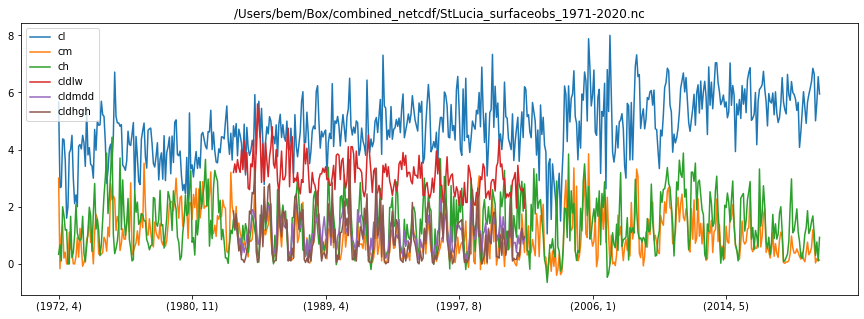

In [21]:
# With ISCCP: 
for file_name in glob.glob(FOLDERNAME):
    print(file_name)
    sc = xr.open_dataset(file_name).to_pandas()
    # append a column with datetime and make it the Index
    sc['Datetime'] = pd.to_datetime(sc[['year', 'month', 'day', 'hour']])
    sc = sc.set_index('Datetime')
    
    sc = sc.mask(sc.ch > 100) # special for St. Lucia which has an outlier in hc
    
    # Make the monthly means 
    momeans=sc.groupby([(sc.index.year),(sc.index.month)]).mean()
    momeancloud = momeans[['cl','cm','ch']]

    # Grab ISCCP while we are at it: 
    xBAH = IS.sel(lat=sc.lat.mean(), lon=sc.lon.mean(), method='nearest'); xBAH;
    BAH = xBAH[['cldlw','cldmdd','cldhgh']].squeeze().drop_vars(['lat','lon','lev']).to_pandas()
    # Make monthly means, it is artificially on 15th of the month
    BAH = BAH.groupby([BAH.index.year, BAH.index.month]).mean()/10

    # Concatenate them and plot together 
    pd.concat([momeancloud,BAH], axis=1).plot(figsize=[15,5],title=file_name);
